# Импорт библиотек и загрузка датасета

Импорт необходимых библиотек

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

RANDOM_STATE = 42

Загрузка датасета с помощью **pd.read_csv**

In [123]:
file = "S05-hw-dataset.csv"
data = pd.read_csv(file, sep=",")

# Вывод данных и анализ

## Анализ датасета

Вывод первых 10 строк датасета с помощью **head()**

In [124]:
data.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


Вывод информации о столбцах и типах с помощью **info()**

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

Вывод бызовых описательных статистик для числовых признаков с помощью **describe()**

In [126]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


Вывод распределения целевого признака **default** с помощью **value_counts(normalize=True)**

In [127]:
data['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Количество дубликатов в датасете равно **0**

In [128]:
num_duplicates = data.duplicated().sum()
print(num_duplicates)

0


Вывод распределения целевого признака **default** с помощью графика

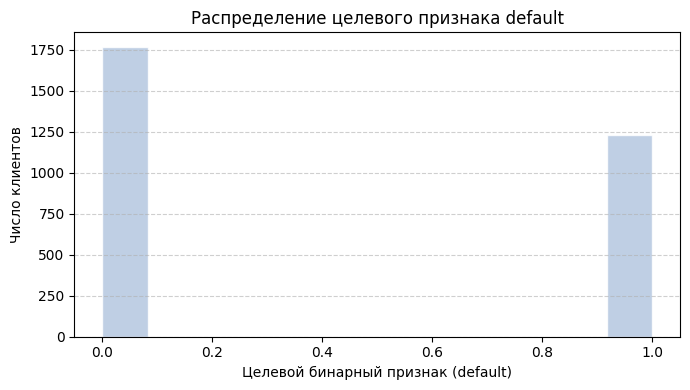

In [129]:
fig, ax = plt.subplots(figsize = (7, 4))
ax.hist(data['default'], bins = 12, color = 'lightsteelblue', edgecolor = 'white', alpha = 0.8)
ax.set_title('Распределение целевого признака default')
ax.set_xlabel('Целевой бинарный признак (default)')
ax.set_ylabel('Число клиентов')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.6)
fig.tight_layout()

# fig.savefig('figures/hist_revenue_purchases', dpi = 300)
plt.show()

## Краткая информация о датасете

- Объектов в датасете - **3000**
- Признаков в датасете - **15** (без учета client_id и default)
- Явные аномалии в датасете - **не обнаружены**
- Распределение таргета:
    - 0 : **0.589667%**
    - 1 : **0.410333%**

# Подготовка признаков и таргета

Выделение матрицы признаков X и вектора таргета y

In [130]:
X = data.iloc[:, 1:16]
y = data.default

Все используемые признаки числовые

In [131]:
X

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2
2996,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12
2997,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10
2998,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8


In [132]:
y

0       0
1       0
2       0
3       1
4       1
       ..
2995    0
2996    0
2997    1
2998    1
2999    0
Name: default, Length: 3000, dtype: int64

In [133]:
X.shape

(3000, 15)

In [134]:
y.shape

(3000,)

In [135]:
X.dtypes

age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

In [136]:
y.dtypes

dtype('int64')

Проверка на попадание debt_to_income в диапазон

In [137]:
for dti in X.debt_to_income:
    if dti <= 0 and dti >= 1:
        print("debt_to_income не находится в диапазоне от 0 до 1")

# Train/Test-сплит и бейзлайн модель

## Разделение данных на обучающую и тестовую выборки

Использую train_test_split:
- разумное соотношение test_size=0.2
- зафиксировал random_state=42 для того, чтобы результаты были воспроизводимыми
- для баланса классов stratify=y

In [138]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE,
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

## Построение бейзлайн-модели на основе DummyClassifier

Использую strategy="stratified"

In [139]:
baseline = DummyClassifier(strategy="stratified", random_state=RANDOM_STATE)

baseline.fit(X_train, y_train)

y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("-=-=-=- Бейзлайн-модель (DummyClassifier, most_frequent) -=-=-=-")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))

try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))

-=-=-=- Бейзлайн-модель (DummyClassifier, most_frequent) -=-=-=-
Accuracy : 0.5133333333333333
ROC-AUC  : 0.5007578889348215
Precision: 0.4108527131782946
Recall   : 0.43089430894308944
F1-score : 0.42063492063492064


Здесь:
- accuracy (доля правильных ответов)
- площаль под ROC-кривой (насколько модель хорошо ранжирует объекты)
- precision (из всех предсказанных "положительных" объектов сколько действительно положительные)
- recall (из всех реально положительных сколько модель поймала)
- f1 (компромисс между precision и recall)

# Логистическая регрессия и подбор гиперпараметров

## Построение Pipeline

Использую:
- StandartScaler - стандартизация признаков
- LogisticRegression - логистическая регрессия

Использую простой перебор параметра регуляции C

In [142]:
C_arr = [0.01, 0.1, 1.0, 10.0]
for C_perem in C_arr:
    log_reg_pipeline = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            (
                "logreg",
                LogisticRegression(
                    max_iter=1000,
                    C=C_perem,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                    solver="liblinear", # надёжный солвер для маленьких датасетов
                    random_state=RANDOM_STATE,
                ),
            ),
        ]
    )
    
    # Обучаем pipeline на train
    log_reg_pipeline.fit(X_train, y_train)
    
    # Предсказываем на validation
    y_val_pred = log_reg_pipeline.predict(X_val)
    y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]
    
    print(f"-=-=-=- Логистическая регрессия (C={C_perem}) – качество на validation -=-=-=-")
    print("Accuracy :", accuracy_score(y_val, y_val_pred))
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))
    print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
    print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
    print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))

-=-=-=- Логистическая регрессия (C=0.01) – качество на validation -=-=-=-
Accuracy : 0.815
ROC-AUC  : 0.8750631574112351
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
-=-=-=- Логистическая регрессия (C=0.1) – качество на validation -=-=-=-
Accuracy : 0.815
ROC-AUC  : 0.8746842129438244
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
-=-=-=- Логистическая регрессия (C=1.0) – качество на validation -=-=-=-
Accuracy : 0.8166666666666667
ROC-AUC  : 0.8746382802811079
Precision: 0.8505154639175257
Recall   : 0.6707317073170732
F1-score : 0.75
-=-=-=- Логистическая регрессия (C=10.0) – качество на validation -=-=-=-
Accuracy : 0.8133333333333334
ROC-AUC  : 0.8746038307840704
Precision: 0.845360824742268
Recall   : 0.6666666666666666
F1-score : 0.7454545454545455


Использую GridSearchCV

In [143]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8535885101695057


In [144]:
best_model = grid_search.best_estimator_

y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

print("-=-=-=- Лучшая модель – качество на validation -=-=-=-")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("\n-=-=-=- Лучшая модель – качество на test -=-=-=-")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

-=-=-=- Лучшая модель – качество на validation -=-=-=-
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

-=-=-=- Лучшая модель – качество на test -=-=-=-
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8749598089201231


## Построение графиков

### ROC-кривая

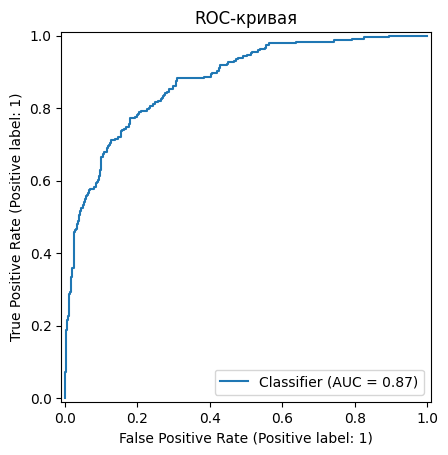

In [145]:
fig_roc, ax_roc = plt.subplots()
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax=ax_roc,
)
ax_roc.set_title('ROC-кривая')
fig_roc.savefig('figures/roc_curve.png', dpi = 300)

### PR-кривая

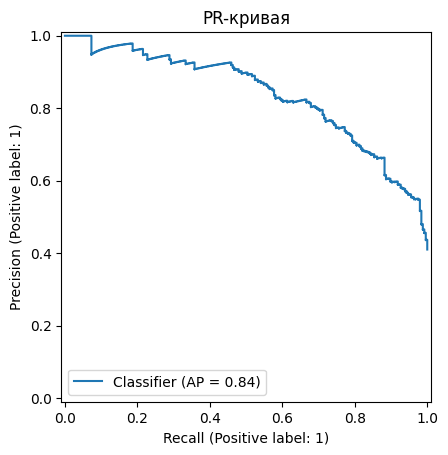

In [146]:
fig_pr, ax_pr = plt.subplots()
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax=ax_pr,
)
ax_pr.set_title('PR-кривая')
fig_pr.savefig('figures/pr_curve.png', dpi = 300)

# Сравнение бейзлайна и логистической регрессии

## Таблица сравнения

In [147]:
data_frame = {
    'Models': ['DummyClassifier', 'LogisticRegression'],
    'Accuracy': [accuracy_score(y_val, y_val_pred_baseline), accuracy_score(y_val, y_val_pred)],
    'ROC-AUC': [roc_auc_score(y_val, y_val_proba_baseline), roc_auc_score(y_val, y_val_proba)],
    'Precision': [precision_score(y_val, y_val_pred_baseline, zero_division=0), precision_score(y_val, y_val_pred, zero_division=0)],
    'Recall': [recall_score(y_val, y_val_pred_baseline, zero_division=0), recall_score(y_val, y_val_pred, zero_division=0)],
    'F1-score': [f1_score(y_val, y_val_pred_baseline, zero_division=0), f1_score(y_val, y_val_pred, zero_division=0)],
}
df = pd.DataFrame(data_frame)
df

,Models,Accuracy,ROC-AUC,Precision,Recall,F1-score
0,DummyClassifier,0.513333,0.500758,0.410853,0.430894,0.420635
1,LogisticRegression,0.813333,0.874604,0.845361,0.666667,0.745455


## Краткий текстовый отчет

Можно сказать, что:
- baseline задает границу снизу по качеству модели (наша модель, которую мы будем обучать, не дожно быть хуже нашего baseline, иначе модель плохая)
- в задачах с возможным дисбалансом классов нельзя смотреть только на accuracy, важно учитывать хотя бы F1 и ROC-AUC
- относительно baseline наша модель увеличила метрики на:
    - accuracy : **0.3**
    - ROC-AUC : **0.374**
    - precision : **0.435**
    - recall : **0.236**
    - f1-score : **0.325**
- чем меньше C, тем сильнее регуляция
- чем больше C, тем модель свободнее
- логическая регрессия на числовых признаках является наиболее разумным выбором